In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('knn_test_data.csv')

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Define features and labels
X = df[['Feature1', 'Feature2']].values
y = df['Label'].values

# Define the test point
test_point = np.array([[4.5, 3.5]])

# Initialize the KNeighborsClassifier
K = 3
knn = KNeighborsClassifier(n_neighbors=K)

# Fit the model
knn.fit(X, y)

# Predict the class for the test point
predicted_label = knn.predict(test_point)

# Get the nearest neighbors
distances, indices = knn.kneighbors(test_point)

# Print the results
print("Test Point:", test_point)
print("Predicted Label:", predicted_label[0])
print("\nNearest Neighbors:")
print(df.iloc[indices[0]])


Test Point: [[4.5 3.5]]
Predicted Label: Class1

Nearest Neighbors:
   Feature1  Feature2   Label
3       4.0       3.9  Class2
4       5.1       2.7  Class1
2       3.3       4.4  Class1


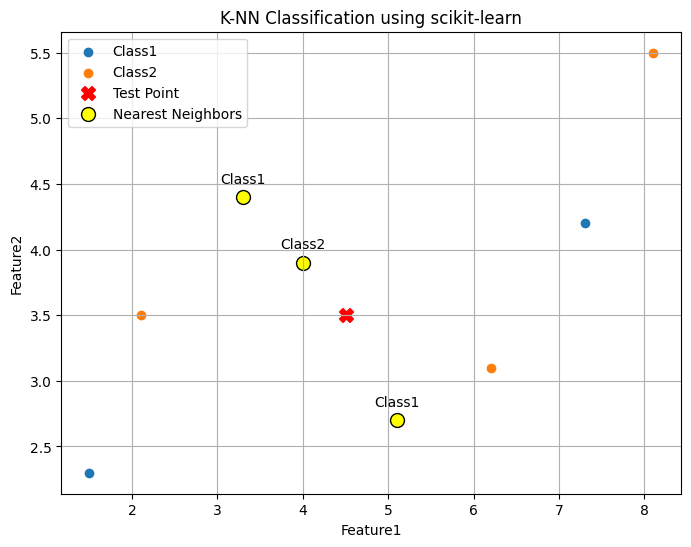

In [4]:
# Plotting the data points
plt.figure(figsize=(8, 6))

# Plot all data points
for label in df['Label'].unique():
    subset = df[df['Label'] == label]
    plt.scatter(subset['Feature1'], subset['Feature2'], label=label)

# Highlight the test point
plt.scatter(test_point[0, 0], test_point[0, 1], color='red', marker='X', s=100, label='Test Point')

# Highlight the nearest neighbors
plt.scatter(df.iloc[indices[0]]['Feature1'], df.iloc[indices[0]]['Feature2'], color='yellow', edgecolor='black', s=100, label='Nearest Neighbors')

# Annotate the nearest neighbors
for i in indices[0]:
    plt.annotate(f"{df.iloc[i]['Label']}", (df.iloc[i]['Feature1'], df.iloc[i]['Feature2']), textcoords="offset points", xytext=(0,10), ha='center')

# Adding labels and legend
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('K-NN Classification using scikit-learn')
plt.legend()
plt.grid(True)
plt.show()